## Пример 1.1.1
Проведем прямую 𝑦 = 𝑚𝑥 + 𝑏 через экспериментальные точки.

[[0. 1.]
 [1. 1.]
 [2. 1.]
 [3. 1.]]
0.9999999999999997 -0.9499999999999992


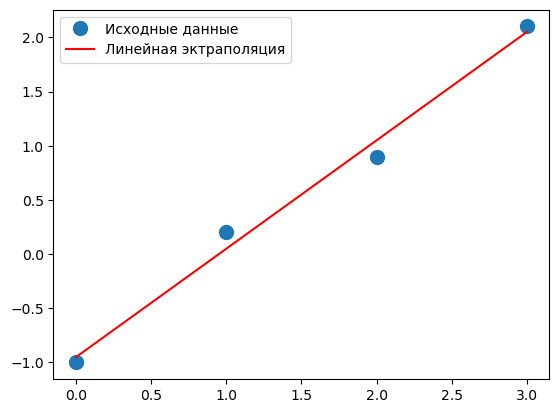

In [21]:
import numpy as np

x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

A = np.vstack([x, np.ones(len(x))]).T
print(A)

m, c = np.linalg.lstsq(A, y, rcond=None)[0]
print(m, c)

import matplotlib.pyplot as plt

plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, m * x + c, 'r', label='Линейная эктраполяция')
plt.legend()
plt.show()

## Пример 1.1.2
Пусть 𝑥, 𝑦 – вектора длиной 𝑛 > 3 (точек > 3). Задача заключается в
построении эстраполяционного полинома второго порядка (параболы). Таким
образом, необходимо найти такие коэффициенты поринома 𝑎, 𝑏, 𝑐 по методу
наименьших квадратов. Данные мтогут быть получены в результате
измерений. Покажем пример генерации данных случайным образом и
загрузки их из файла.

[-4.60049703 -4.09664043 -2.62188735 -2.16731756 -1.27757333 -0.24820637
  0.5368181   1.63372446  3.25396907  4.09563425  5.22822112]
[25.28580309 16.22392803  9.27145468  3.74469719  0.72714153 -0.40571098
  0.69002002  3.74905975  9.47299686 16.18220067 25.39285722]


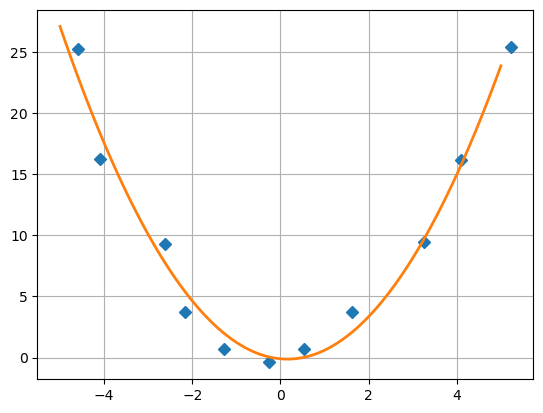

In [22]:
from numpy import *
from numpy.random import *

delta = 1.0
x = linspace(-5, 5, 11)
y = x ** 2 + delta * (rand(11) - 0.5)
x += delta * (rand(11) - 0.5)

x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')

print(x)
print(y)

m = vstack((x ** 2, x, ones(11))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]

x_prec = linspace(-5, 5, 101)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec ** 2 + s[1] * x_prec + s[2], '-', lw=2)
plt.grid()
plt.savefig('парабола.png')

## Пример 1.1.3
По данным предыдущего примера постройте эстраполяционного полинома
третьего порядка

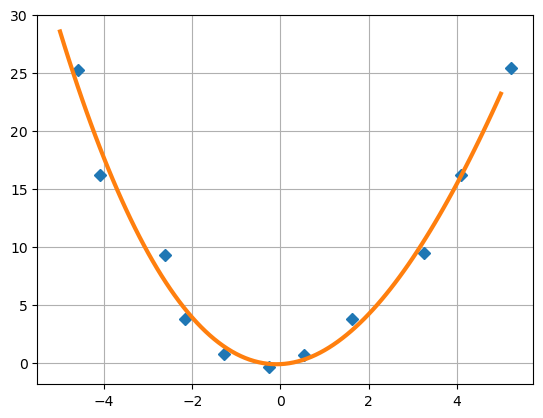

In [23]:
m = vstack((x ** 3, x ** 2, x, ones(11))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]

x_prec = linspace(-5, 5, 101)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec ** 3 + s[1] * x_prec ** 2 + s[2] * x_prec + s[3], '-', lw=3)
plt.grid()
plt.savefig('полином третьей степени.png')

## Задание
Представьте собственные данные и постройте эктраполяцию полиномами
первой, второй и третьей степени.

[[ 4.  1.]
 [10.  1.]
 [16.  1.]
 [40.  1.]]
0.3920682730923695 -5.623694779116467


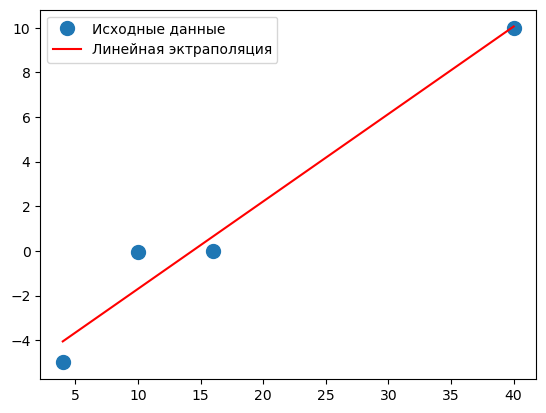

In [24]:
import numpy as np

x = np.array([4, 10, 16, 40])
y = np.array([-5, -0.05, 0, 10])

A = np.vstack([x, np.ones(len(x))]).T
print(A)

m, c = np.linalg.lstsq(A, y, rcond=None)[0]
print(m, c)

import matplotlib.pyplot as plt

plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, m * x + c, 'r', label='Линейная эктраполяция')
plt.legend()
plt.show()

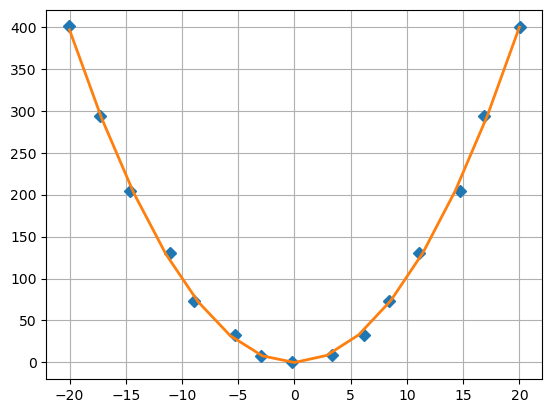

In [25]:
from numpy import *
from numpy.random import *

delta = 1.0
x = linspace(-20, 20, 15)
y = x ** 2 + delta * (rand(15) - 0.5)
x += delta * (rand(15) - 0.5)

m = vstack((x ** 2, x, ones(15))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]

x_prec = linspace(-20, 20, 15)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec ** 2 + s[1] * x_prec + s[2], '-', lw=2)
plt.grid()
plt.savefig('парабола2.png')

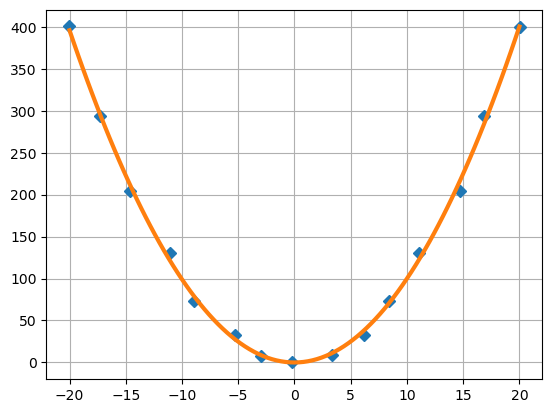

In [26]:
m = vstack((x ** 3, x ** 2, x, ones(15))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]

x_prec = linspace(-20, 20, 101)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec ** 3 + s[1] * x_prec ** 2 + s[2] * x_prec + s[3], '-', lw=3)
plt.grid()
plt.savefig('полином третьей степени.png')

## Пример 1.1.4
Необходимо проверить гипотезу, что наши точечно заданная функция ложится
на кривую вида 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑒𝑥𝑝(−𝑏2𝑥^2)

[0.25732452 0.74867492 0.54472359]
0.00016018298765666162
0.0803402338343516


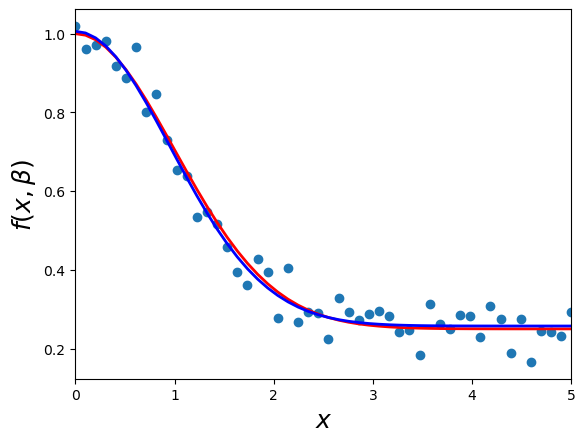

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]
[1.01966439 0.96100347 0.97107395 0.98041582 0.91905586 0.88718598
 0.96532144 0.80198895 0.84665864 0.72979551 0.65421277 0.63791341
 0.53310864 0.54695656 0.51705059 0.45898922 0.39499232 0.36052226
 0.42755314 0.39491852 0.27760918 0.40404163 0.26665586 0.29230235
 0.29102281 0.22331928 0.32819595 0.29412246 0.27330125 0.28689027
 0.29662908 0.28338729 0.24312005 0.24750813 0.18347425 0.31407925
 0.26247091 0.24983501 0.2859648  0.28

In [27]:
beta = (0.25, 0.75, 0.5)


def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x ** 2)


xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))

from scipy.optimize import curve_fit

beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()
print(xdata)
print(ydata)

## Пример 1.1.5
Необходимо проверить гипотезу, что наши точечно заданная функция ложится
на кривые вида:
1) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥
2) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥 + 𝑏2𝑥^2
3) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑙𝑛(𝑥)
4) 𝑓(𝑥, 𝑏) = 𝑏0 𝑥^𝑏1

[0.25971897 0.74708484]
7.130551848968559e-05
0.08455705107328361


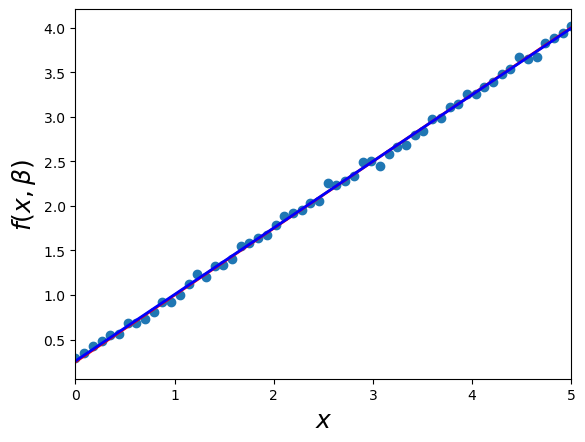

[0.24181541 0.76354469 0.49735583]
0.0001376449186829433
0.11478144800898457


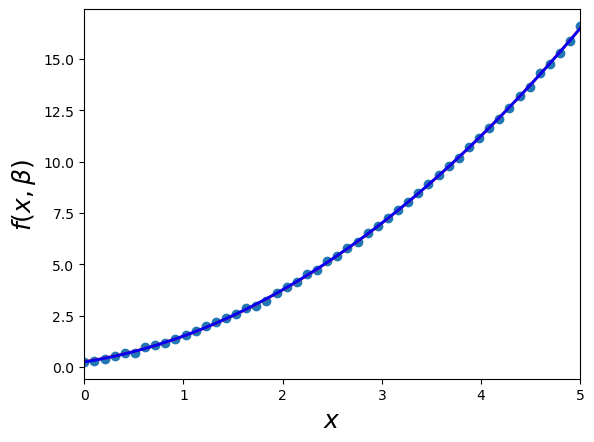

[0.988538   2.01270287]
5.5589582475934983e-05
0.12854765041859956


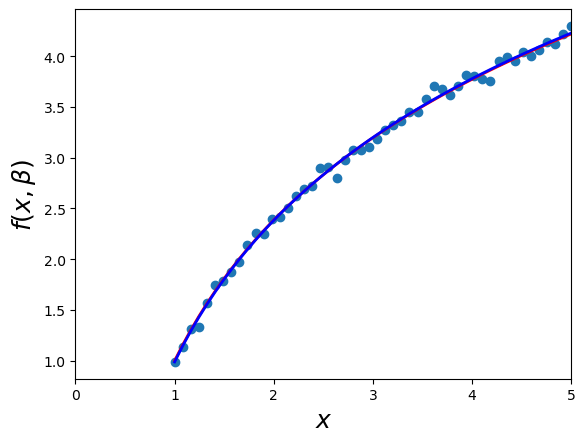

[1.00743888 1.99455948]
5.799538793259769e-06
0.1343426572781968


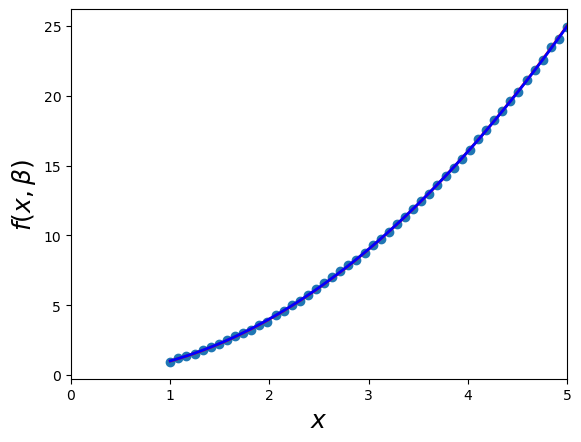

In [28]:
#Решение 1
beta = (0.25, 0.75)


def f(x, b0, b1):
    return b0 + b1 * x


xdata = np.linspace(0, 5, 58)

y = f(xdata, *beta)

ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

#Решение 2

beta = (0.25, 0.75, 0.5)


def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x * x


xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

#Решение 3

beta = (1, 2)


def f(x, b0, b1):
    return b0 + b1 * np.log(x)


xdata = np.linspace(1, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

# Решение 4

beta = (1, 2)


def f(x, b0, b1):
    return b0 * x ** b1


xdata = np.linspace(1, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

## Задание
Подставьте собственные данные и поэкспериментируйте с представленными
функциями. Проанализируйте динамику изменения данных.

[0.06325283 0.94987275]
8.143169497510484e-05
0.09656506898379114


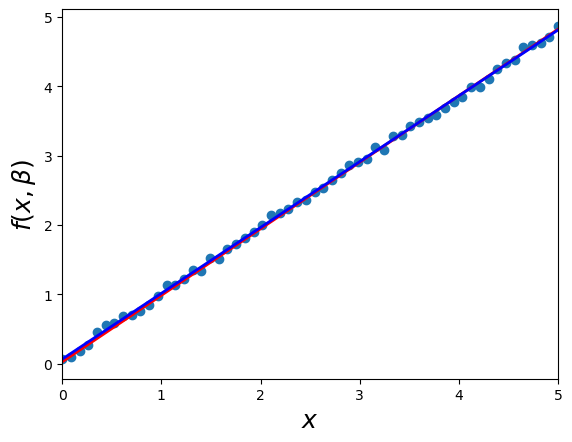

[0.53306316 0.73562991 0.11001055]
9.201376695396082e-05
0.07672984643884016


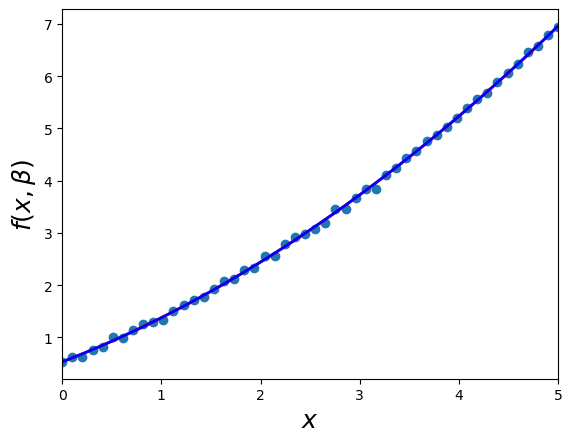

[1.77484582e-02 4.19915548e+01]
3.9915439820153374e-05
0.09229596572069573


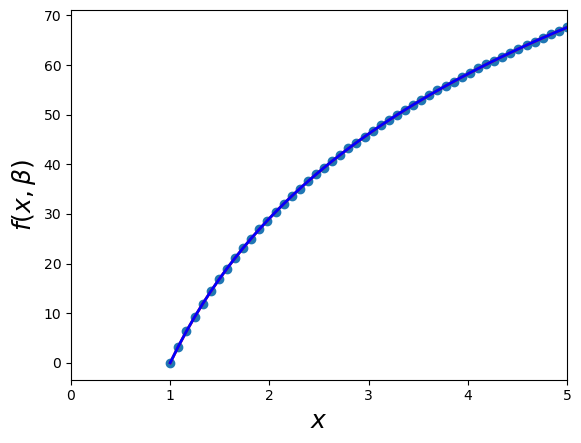

[-0.99999942  5.99999996]
1.5005791647226944e-09
0.13829130223983535


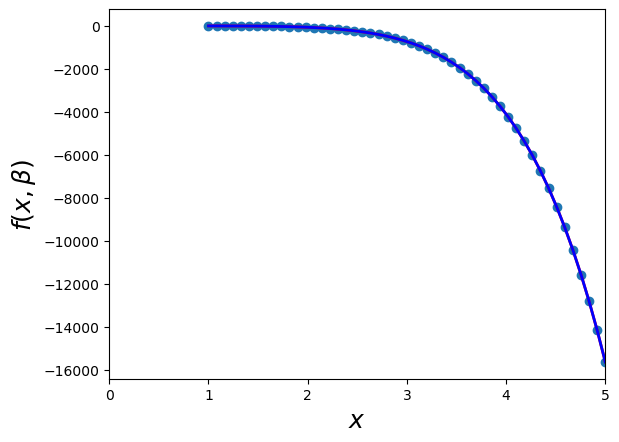

In [29]:
#Решение 1
beta = (0.024, 0.96)


def f(x, b0, b1):
    return b0 + b1 * x


xdata = np.linspace(0, 5, 58)

y = f(xdata, *beta)

ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

#Решение 2

beta = (0.532, 0.735, 0.11)


def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x * x


xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

#Решение 3

beta = (0, 42)


def f(x, b0, b1):
    return b0 + b1 * np.log(x)


xdata = np.linspace(1, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

# Решение 4

beta = (-1, 6)


def f(x, b0, b1):
    return b0 * x ** b1


xdata = np.linspace(1, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

## Пример 1.2.1
Построим простую линейную регрессию в Python с использованием
библиотеки scikit-learn

   Учебное время  Оценка
0           0.50      10
1           0.75      22
2           1.00      13
3           1.25      43
4           1.50      20
(20, 2)
       Учебное время     Оценка
count      20.000000  20.000000
mean        2.787500  53.700000
std         1.507165  26.435821
min         0.500000  10.000000
25%         1.687500  30.250000
50%         2.625000  58.500000
75%         4.062500  75.250000
max         5.500000  93.000000


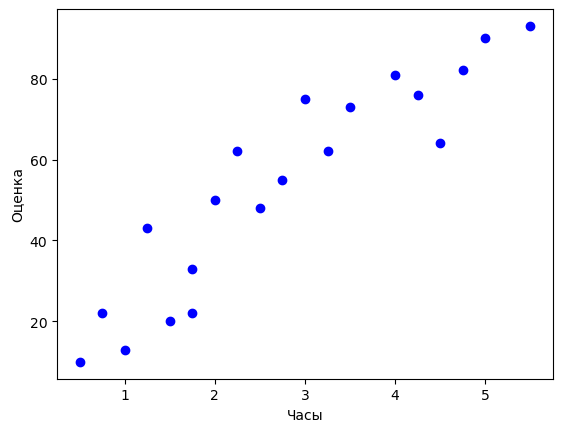

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

my_dict = {
    'Учебное время': [0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25,
                      4.50, 4.75,
                      5.00, 5.50],
    'Оценка': [10, 22, 13, 43, 20, 22, 33, 50, 62, 48, 55, 75, 62, 73, 81, 76, 64, 82, 90, 93]}

dataset = pd.DataFrame(my_dict)
print(dataset.head())
print(dataset.shape)
print(dataset.describe())
plt.scatter(dataset['Учебное время'], dataset['Оценка'], color='b', label='данные эксперимента')
plt.xlabel("Часы")
plt.ylabel("Оценка")
plt.show()

In [31]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(x)
print(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

[[0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]
 [1.75]
 [1.75]
 [2.  ]
 [2.25]
 [2.5 ]
 [2.75]
 [3.  ]
 [3.25]
 [3.5 ]
 [4.  ]
 [4.25]
 [4.5 ]
 [4.75]
 [5.  ]
 [5.5 ]]
[10 22 13 43 20 22 33 50 62 48 55 75 62 73 81 76 64 82 90 93]
5.475400029908791
[17.02706744]


   Actual  Predicted
0      90  90.610737
1      22  18.245701
2      93  99.124271
3      62  43.786302


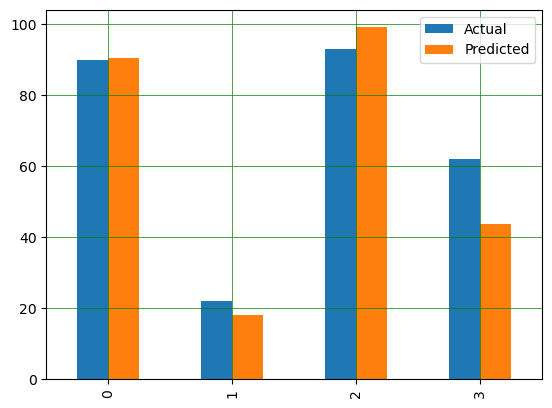

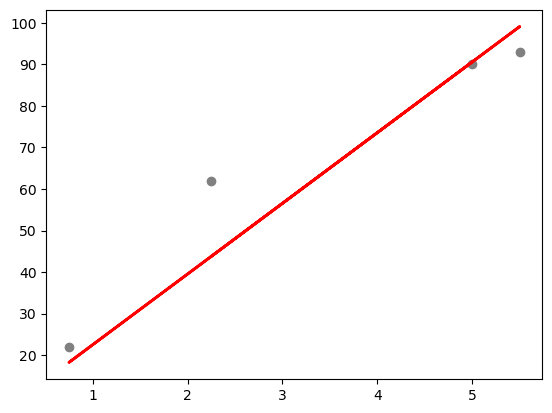

In [32]:
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
plt.scatter(x_test, y_test, color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()

## Задание
Постройте модель линейной регрессии для произвольных данных из двух
столбцов. Для примера можно взять точечную зависимость заработной платы от
опыта работы: (https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv).
Найдите коэффициенты линии регрессии. Постройте прогноз.

   Учебное время  Оценка
0            0.5      12
1            1.0      13
2            1.5      17
3            2.0      18
4            2.5      21
(11, 2)
       Учебное время     Оценка
count      11.000000  11.000000
mean        3.000000  28.000000
std         1.658312  12.513992
min         0.500000  12.000000
25%         1.750000  17.500000
50%         3.000000  30.000000
75%         4.250000  38.500000
max         5.500000  47.000000


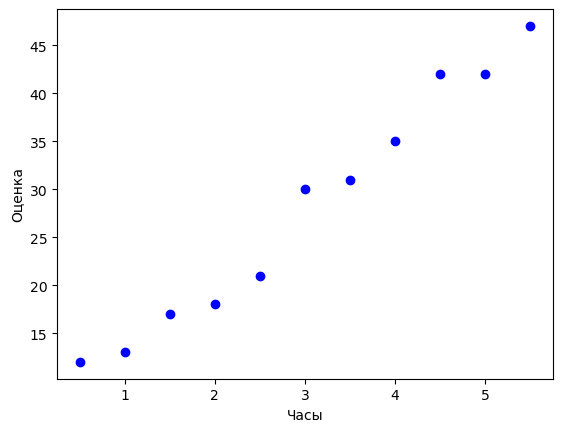

[[0.5]
 [1. ]
 [1.5]
 [2. ]
 [2.5]
 [3. ]
 [3.5]
 [4. ]
 [4.5]
 [5. ]
 [5.5]]
[12 13 17 18 21 30 31 35 42 42 47]
   Actual  Predicted
0      21  24.761905
1      42  43.452381
2      17  17.285714


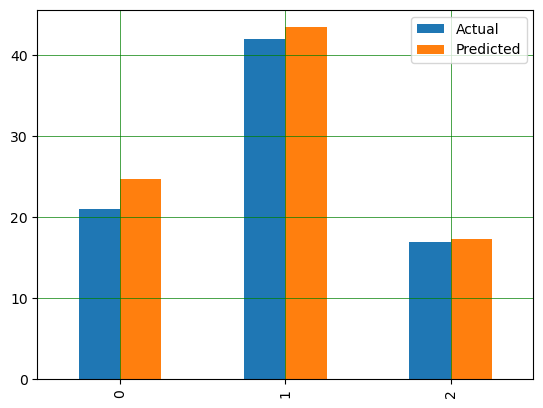

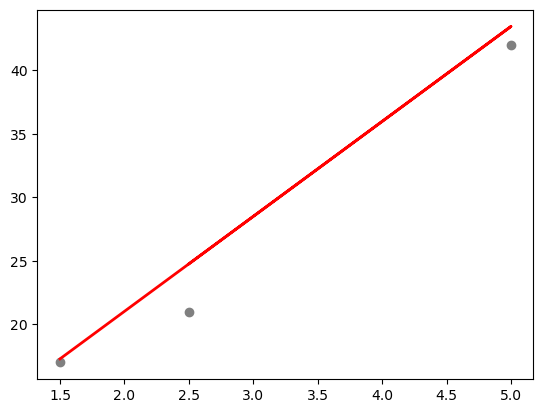

In [33]:
my_dict = {
    'Учебное время': [0.25 * i for i in range(2, 23, 2)],
    'Оценка': sorted([randint(10, 50) for i in range(11)])}
dataset = pd.DataFrame(my_dict)
print(dataset.head())
print(dataset.shape)
print(dataset.describe())
plt.scatter(dataset['Учебное время'], dataset['Оценка'], color='b', label='данные эксперимента')
plt.xlabel("Часы")
plt.ylabel("Оценка")
plt.show()

x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(x)
print(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
plt.scatter(x_test, y_test, color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()

## Пример 1.3.1
Для решения задачи множественной регрессии можно задействовать уже
известный метод numpy.linalg.lstsq.

In [34]:
import numpy as np

y = [1, 2, 3, 4, 3, 4, 5, 3, 5, 5, 4, 5, 4, 5, 4, 5, 6, 0, 6, 3, 1, 3, 1]
x = [[0, 2, 4, 1, 5, 4, 5, 9, 9, 9, 3, 7, 8, 8, 6, 6, 5, 5, 5, 6, 6, 5, 5],
     [4, 1, 2, 3, 4, 5, 6, 7, 5, 8, 7, 8, 7, 8, 7, 8, 6, 8, 9, 2, 1, 5, 6],
     [4, 1, 2, 5, 6, 7, 8, 9, 7, 8, 7, 8, 7, 4, 3, 1, 2, 3, 4, 1, 3, 9, 7]]
x = np.transpose(x)
x = np.c_[x, np.ones(x.shape[0])]
linreg = np.linalg.lstsq(x, y, rcond=None)[0]
print(linreg)

[ 0.1338682   0.26840334 -0.02874936  1.5122571 ]


## Пример 1.3.2
Для данных из предыдущей задачи построить модель множественной
линейной регрессии с использованием средств библиотеки sсikit-learn.

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

y = [1, 2, 3, 4, 3, 4, 5, 3, 5, 5, 4, 5, 4, 5, 4, 5, 6, 0, 6, 3, 1, 3, 1]

x = [[0, 2, 4, 1, 5, 4, 5, 9, 9, 9, 3, 7, 8, 8, 6, 6, 5, 5, 5, 6, 6, 5, 5],
     [4, 1, 2, 3, 4, 5, 6, 7, 5, 8, 7, 8, 7, 8, 7, 8, 6, 8, 9, 2, 1, 5, 6],
     [4, 1, 2, 5, 6, 7, 8, 9, 7, 8, 7, 8, 7, 4, 3, 1, 2, 3, 4, 1, 3, 9, 7]]

new_y = np.array(y)
new_y = new_y.transpose()
df1 = pd.DataFrame(new_y)
new_x = np.array(x)
new_x = new_x.transpose()

df2 = pd.DataFrame(new_x)
df1 = df1.rename(columns={0: "y"}, inplace=False)
df2 = df2.rename(columns={0: 'x1', 1: 'x2', 2: 'x3'}, inplace=False)

frames = [df1, df2]
dataset = pd.concat([df1, df2], axis=1, join="inner")
print(dataset.head())
print(dataset.shape)
dataset.describe()
x = dataset[["x1", "x2", "x3"]]
y = dataset['y']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
print(coeff_df)
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predict': y_pred})
print(df)
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))

   y  x1  x2  x3
0  1   0   4   4
1  2   2   1   1
2  3   4   2   2
3  4   1   3   5
4  3   5   4   6
(23, 4)
    Coefficient
x1     0.223219
x2     0.136709
x3    -0.063757
    Actual   Predict
11       5  4.119478
10       4  3.153648
21       3  3.199155
14       4  4.078333
20       1  3.258079
Mean Squared Error: 1.327269924234307


## Задание
Постройте модель множественной линейной регрессии для произвольных
данных из нескольких столбцов. Для примера можно взять потребления
газа (в миллионах галлонов) в 48 штатах США или набор данных о
качестве красного вина (1) и (2) соответственно. Найдите коэффициенты
множественной регрессии. Постройте прогноз.
1. https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/pe
trol_consumption.csv
2. https://raw.githubusercontent.com/aniruddhachoudhury/Red-WineQuality/master/winequality-red.csv

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

y = [randint(0, 11) for i in range(26)]

x = [[randint(0, 11) for i in range(26)],
     [randint(0, 11) for i in range(26)],
     [randint(0, 11) for i in range(26)]]

new_y = np.array(y)
new_y = new_y.transpose()
df1 = pd.DataFrame(new_y)
new_x = np.array(x)
new_x = new_x.transpose()

df2 = pd.DataFrame(new_x)
df1 = df1.rename(columns={0: "y"}, inplace=False)
df2 = df2.rename(columns={0: 'x1', 1: 'x2', 2: 'x3'}, inplace=False)

frames = [df1, df2]
dataset = pd.concat([df1, df2], axis=1, join="inner")
print(dataset.head())
print(dataset.shape)
dataset.describe()
x = dataset[["x1", "x2", "x3"]]
y = dataset['y']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)

#Вывод кожфов
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
print(coeff_df)
#Прогноз
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predict': y_pred})
df

   y  x1  x2  x3
0  4   7   3   0
1  7   1   7   8
2  3  10   6   2
3  6   5   7   2
4  3   1   0   7
(26, 4)
    Coefficient
x1     0.044789
x2     0.242593
x3    -0.000760


,Actual,Predict
2,3,5.279465
20,1,5.797389
14,7,5.930994
17,4,4.989042
5,0,4.194138
11,3,5.405582


In [37]:
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 8.95158243624137
